In [560]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### Описание датасета

**airports_nearest**: Distance to the nearest airport in meters

**balcony**: Number of balconies

**ceiling_height**: Ceiling height in meters

**cityCenters_nearest**: Distance to the city center in meters

**days_exposition**: Number of days the listing was active (from publication to removal)

**first_day_exposition**: Publication date

**floor**: Floor number of the property

**floors_total**: Total number of floors in the building

**is_apartment**: Boolean indicating if the property is an apartment

**kitchen_area**: Kitchen area in square meters

**last_price**: Price at the time of listing removal

**living_area**: Living area in square meters

**locality_name**: Name of the locality

**open_plan**: Boolean indicating if the property has an open floor plan

**parks_around3000**: Number of parks within a 3 km radius

**parks_nearest**: Distance to the nearest park in meters

**ponds_around3000**: Number of ponds/water bodies within a 3 km radius

**ponds_nearest**: Distance to the nearest pond/water body in meters

**rooms**: Number of rooms

**studio**: Boolean indicating if the property is a studio apartment

**total_area**: Total area of the property in square meters

**total_images**: Number of photos in the listing

In [561]:
real_estate_data = pd.read_csv('real_estate_data.csv', delimiter='\t')
real_estate_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [562]:
real_estate_data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [563]:
real_estate_data.shape

(23699, 22)

In [564]:
real_estate_data[real_estate_data['ceiling_height'] == 100]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


In [565]:
real_estate_data.drop(index=real_estate_data[real_estate_data['ceiling_height'] == 100].index, inplace=True)

In [566]:
real_estate_data[real_estate_data['airports_nearest'] == 0]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21085,0,7000000.0,34.7,2018-09-23T00:00:00,1,2.7,9.0,19.8,3,NaN,...,6.0,2.0,Санкт-Петербург,0.0,22801.0,0.0,NaN,0.0,NaN,60.0


In [567]:
real_estate_data[real_estate_data['is_apartment'] == True]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.60,2018-11-06T00:00:00,2,3.50,3.0,29.400000,1,True,...,NaN,NaN,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.00,2018-01-11T00:00:00,2,3.12,3.0,40.000000,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.80,2014-12-09T00:00:00,2,NaN,6.0,58.300000,5,True,...,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.10,2019-01-30T00:00:00,1,NaN,9.0,NaN,1,True,...,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.00,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2975,9,4931398.0,42.90,2018-07-23T00:00:00,1,3.15,4.0,20.390000,3,True,...,10.29,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3067,13,6600000.0,95.00,2018-09-08T00:00:00,2,4.50,7.0,45.000000,7,True,...,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3816,4,4779000.0,53.10,2016-05-16T00:00:00,1,NaN,13.0,19.800000,6,True,...,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4300000.0,50.00,2019-04-20T00:00:00,1,3.00,11.0,17.000000,9,True,...,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4339,19,6900000.0,72.00,2019-03-25T00:00:00,3,3.50,4.0,70.000000,1,True,...,NaN,NaN,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


In [568]:
real_estate_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23698 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23698 non-null  int64  
 1   last_price            23698 non-null  float64
 2   total_area            23698 non-null  float64
 3   first_day_exposition  23698 non-null  object 
 4   rooms                 23698 non-null  int64  
 5   ceiling_height        14503 non-null  float64
 6   floors_total          23612 non-null  float64
 7   living_area           21795 non-null  float64
 8   floor                 23698 non-null  int64  
 9   is_apartment          2774 non-null   object 
 10  studio                23698 non-null  bool   
 11  open_plan             23698 non-null  bool   
 12  kitchen_area          21420 non-null  float64
 13  balcony               12179 non-null  float64
 14  locality_name         23649 non-null  object 
 15  airports_nearest      18

In [569]:
real_estate_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

<Axes: >

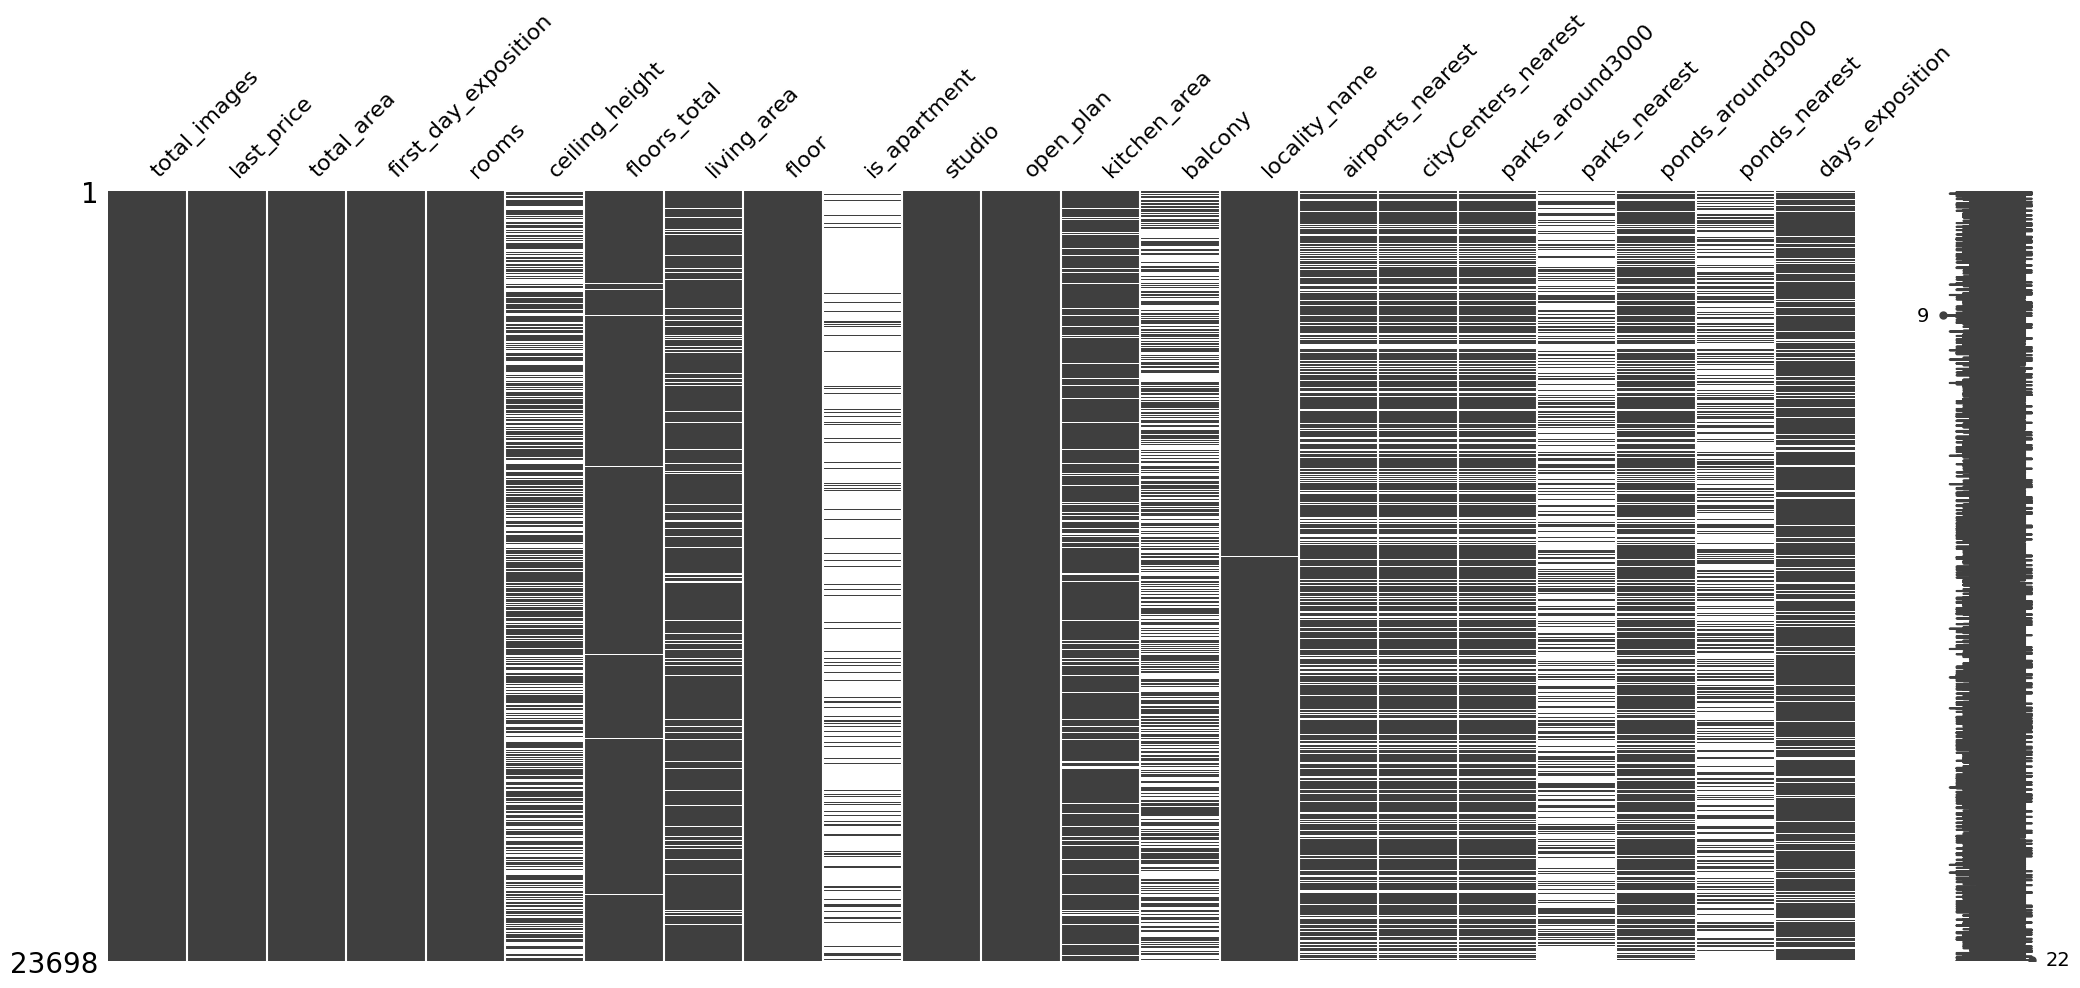

In [570]:
msno.matrix(real_estate_data)

#### Корреляция до обработки

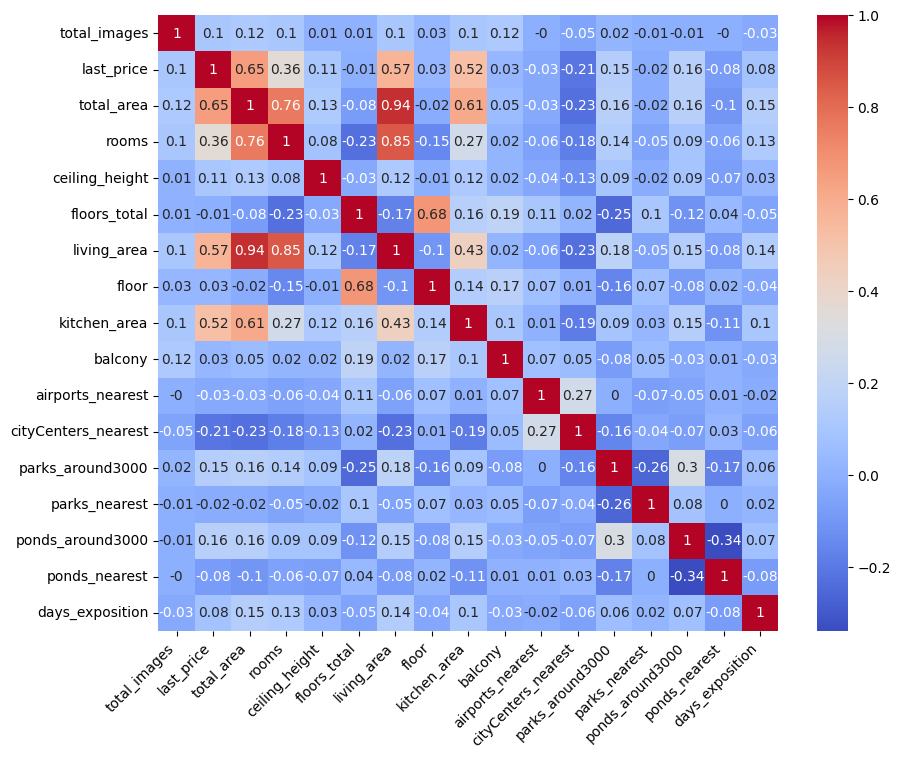

In [571]:
numeric_df = real_estate_data.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')

plt.show()

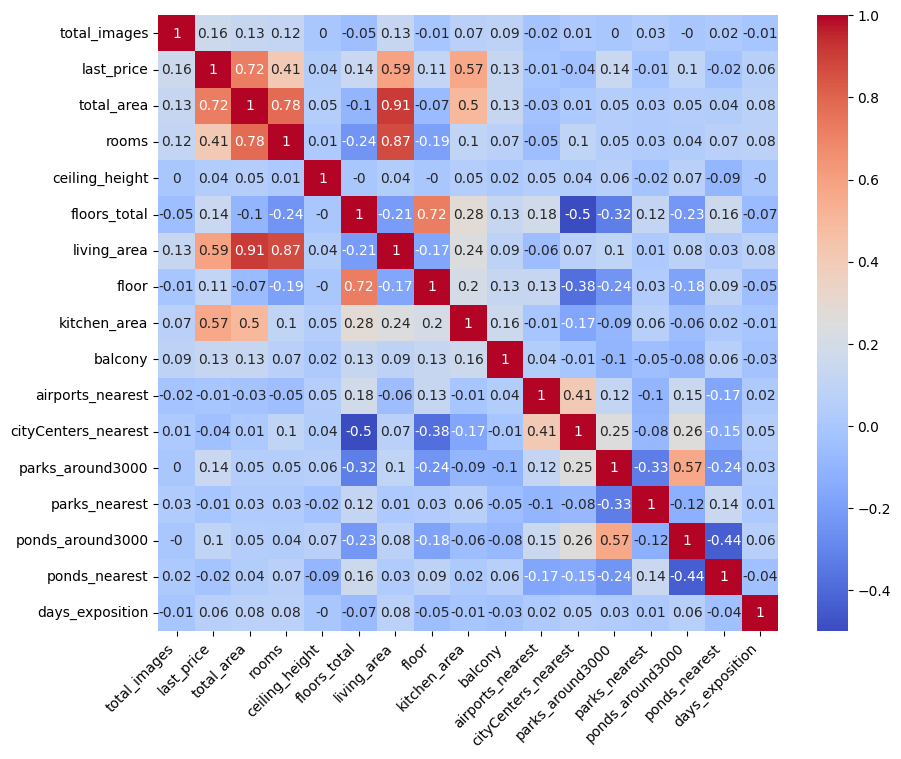

In [572]:
df_not_spb = real_estate_data[real_estate_data['locality_name'] != 'Санкт-Петербург'].select_dtypes(include=['number'])
corr_matrix = df_not_spb.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')

plt.show()

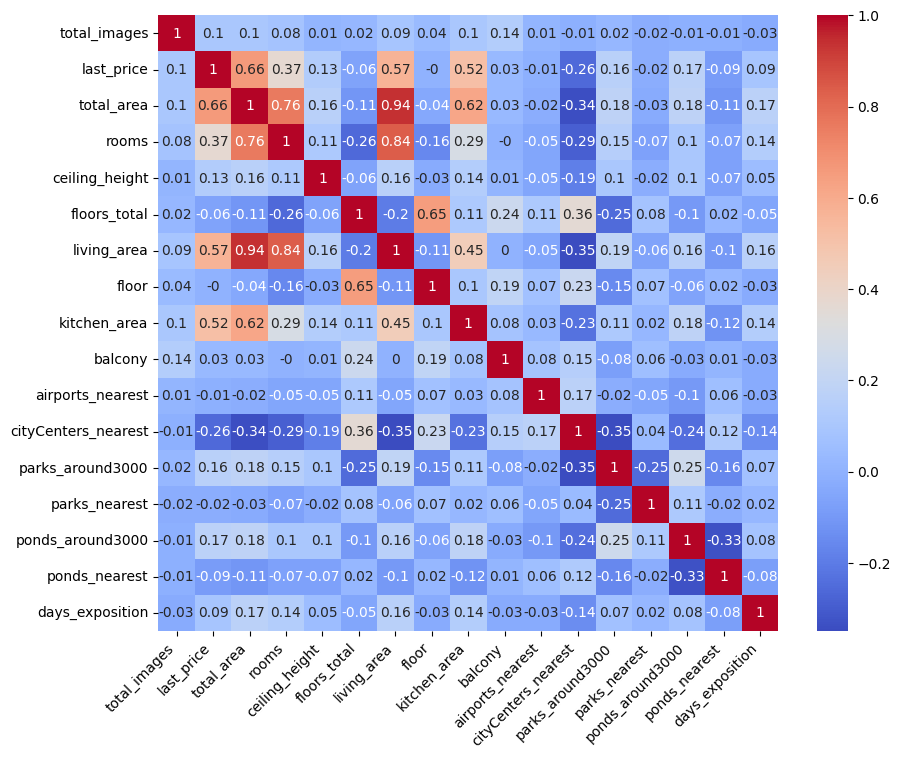

In [573]:
df_spb = real_estate_data[real_estate_data['locality_name'] == 'Санкт-Петербург'].select_dtypes(include=['number'])
corr_matrix = df_spb.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')

plt.show()

In [574]:
print(df_not_spb.shape)

(7978, 17)


In [575]:
df_not_spb[df_not_spb['cityCenters_nearest'].isna() & df_not_spb['airports_nearest'].isna()]

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,1,NaN,12.0,14.40,5,9.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,1,NaN,27.0,15.43,26,8.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2,NaN,5.0,30.00,5,9.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2,2.75,25.0,30.00,15,11.00,2.0,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,1,NaN,9.0,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,4,2.50,5.0,45.50,3,5.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,1,NaN,5.0,17.50,4,6.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,3,NaN,5.0,38.00,4,8.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2,NaN,3.0,29.70,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Обработка пропущенных значений

In [576]:
real_estate_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [577]:
real_estate_data[real_estate_data['cityCenters_nearest'].isna() & real_estate_data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,NaN,...,5.50,NaN,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


airports_nearest & cityCenters_nearest

In [578]:
real_estate_data['airports_nearest'].fillna(real_estate_data.groupby('locality_name')['airports_nearest'].transform('mean').round(1), inplace = True)

In [579]:
real_estate_data['cityCenters_nearest'].fillna(real_estate_data.groupby('locality_name')['cityCenters_nearest'].transform('mean').round(1), inplace = True)

In [580]:
real_estate_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5394
cityCenters_nearest      5394
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [581]:
locations = real_estate_data[real_estate_data['airports_nearest'].isna()]['locality_name'].unique()
locations2 = real_estate_data[real_estate_data['cityCenters_nearest'].isna()]['locality_name'].unique()

In [582]:
locations_str = [str(item) for item in locations]
locations2_str = [str(item) for item in locations2]

print(sorted(locations_str) == sorted(locations2_str))

True


#### df_locations

In [583]:
from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
import time

geolocator = Nominatim(user_agent="GeoapiExercises")

def get_coordinates(place):
    try:
        location = geolocator.geocode(place)
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except GeocoderTimedOut:
        return get_coordinates(place)

coordinates = []
for place in locations:
    lat, lon = get_coordinates(place)
    coordinates.append({"locality_name": place, "Latitude": lat, "Longitude": lon})
    time.sleep(1)

df_locations = pd.DataFrame(coordinates)

df_locations

,locality_name,Latitude,Longitude
0,городской посёлок Янино-1,55.199871,39.379366
1,посёлок Мурино,52.671650,104.719009
2,Сертолово,60.143707,30.207806
3,деревня Кудрово,NaN,NaN
4,Коммунар,59.622195,30.391922
...,...,...,...
332,деревня Нижняя,59.679787,30.100800
333,коттеджный посёлок Лесное,54.575744,38.036219
334,деревня Тихковицы,NaN,NaN
335,деревня Борисова Грива,60.095356,30.973253


#### Обработка пропущенных значений 

Координаты Пулково
59.799800 30.273000

In [584]:
from geopy.distance import geodesic
pulkov_lat, pulkov_lon = 59.799800, 30.273000

def calculate_distance(row):
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        place_coordinates = (row['Latitude'], row['Longitude'])
        pulkov_coordinates = (pulkov_lat, pulkov_lon)
        return geodesic(place_coordinates, pulkov_coordinates).meters
    else:
        return None

df_locations['airports_nearest'] = df_locations.apply(calculate_distance, axis=1)

df_locations

,locality_name,Latitude,Longitude,airports_nearest
0,городской посёлок Янино-1,55.199871,39.379366,7.474850e+05
1,посёлок Мурино,52.671650,104.719009,4.432907e+06
2,Сертолово,60.143707,30.207806,3.848790e+04
3,деревня Кудрово,NaN,NaN,NaN
4,Коммунар,59.622195,30.391922,2.088799e+04
...,...,...,...,...
332,деревня Нижняя,59.679787,30.100800,1.650906e+04
333,коттеджный посёлок Лесное,54.575744,38.036219,7.465270e+05
334,деревня Тихковицы,NaN,NaN,NaN
335,деревня Борисова Грива,60.095356,30.973253,5.114534e+04


In [585]:
df_merged = pd.merge(real_estate_data, df_locations, on='locality_name', how='left', suffixes=('', '_df'))

df_merged['airports_nearest'] = df_merged['airports_nearest'].fillna(df_merged['airports_nearest_df'])

real_estate_data = df_merged.drop(columns=['airports_nearest_df', 'Longitude', 'Latitude'])

real_estate_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,1.886300e+04,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,1.281700e+04,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,2.174100e+04,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,2.809800e+04,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,3.185600e+04,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,2.466500e+04,4232.0,1.0,796.0,3.0,381.0,NaN
23694,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,4.460317e+04,NaN,NaN,NaN,NaN,NaN,45.0
23695,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,6.073622e+05,NaN,NaN,NaN,NaN,NaN,NaN
23696,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,3.914000e+04,10364.0,2.0,173.0,3.0,196.0,602.0


Координаты центра СПБ 59.950001395	30.316669530

In [586]:
from geopy.distance import geodesic
cityCenters_lat, cityCenters_lon = 59.950001395, 30.316669530

def calculate_distance(row):
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        place_coordinates = (row['Latitude'], row['Longitude'])
        cityCenters_coordinates = (cityCenters_lat, cityCenters_lon)
        return geodesic(place_coordinates, cityCenters_coordinates).meters
    else:
        return None

df_locations['cityCenters_nearest'] = df_locations.apply(calculate_distance, axis=1)
df_locations = df_locations.drop(columns=['Longitude', 'Latitude', 'airports_nearest'])

df_locations

,locality_name,cityCenters_nearest
0,городской посёлок Янино-1,7.563251e+05
1,посёлок Мурино,4.423898e+06
2,Сертолово,2.241763e+04
3,деревня Кудрово,NaN
4,Коммунар,3.676412e+04
...,...,...
332,деревня Нижняя,3.244977e+04
333,коттеджный посёлок Лесное,7.573927e+05
334,деревня Тихковицы,NaN
335,деревня Борисова Грива,4.003371e+04


In [587]:
df_merged = pd.merge(real_estate_data, df_locations, on='locality_name', how='left', suffixes=('', '_df'))

df_merged['cityCenters_nearest'] = df_merged['cityCenters_nearest'].fillna(df_merged['cityCenters_nearest_df'])

real_estate_data = df_merged.drop(columns=['cityCenters_nearest_df'])

real_estate_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,1.886300e+04,1.602800e+04,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,1.281700e+04,1.860300e+04,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,2.174100e+04,1.393300e+04,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,2.809800e+04,6.800000e+03,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,3.185600e+04,8.098000e+03,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,2.466500e+04,4.232000e+03,1.0,796.0,3.0,381.0,NaN
23694,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,4.460317e+04,5.538343e+04,NaN,NaN,NaN,NaN,45.0
23695,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,6.073622e+05,6.171659e+05,NaN,NaN,NaN,NaN,NaN
23696,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,3.914000e+04,1.036400e+04,2.0,173.0,3.0,196.0,602.0


living_area

In [588]:
known_data = real_estate_data.dropna(subset=['living_area'])
unknown_data = real_estate_data[real_estate_data['living_area'].isna()]
model = LinearRegression()
model.fit(known_data[['total_area']], known_data['living_area'])
predicted_living_area = model.predict(unknown_data[['total_area']])
real_estate_data.loc[real_estate_data['living_area'].isna(), 'living_area'] = predicted_living_area

In [589]:
real_estate_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         1024
cityCenters_nearest      1024
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

floors_total

In [590]:
mean_floor = real_estate_data['floors_total'].mean().round(0)

In [591]:
real_estate_data['floors_total'] .fillna(np.maximum(real_estate_data['floor'], mean_floor), inplace = True)

kitchen_area

In [592]:
known_data = real_estate_data.dropna(subset=['kitchen_area'])
unknown_data = real_estate_data[real_estate_data['kitchen_area'].isna()]
model = LinearRegression()
model.fit(known_data[['total_area']], known_data['kitchen_area'])
predicted_living_area = model.predict(unknown_data[['total_area']])
real_estate_data.loc[real_estate_data['kitchen_area'].isna(), 'kitchen_area'] = predicted_living_area

In [593]:
real_estate_data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total                0
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area                0
balcony                 11519
locality_name              49
airports_nearest         1024
cityCenters_nearest      1024
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

ceiling_height

In [594]:
real_estate_data['ceiling_height'].fillna((real_estate_data['ceiling_height'].mean().round(0)), inplace = True)

balcony & is_apartament

In [595]:
real_estate_data['balcony'].fillna(0, inplace = True)

In [596]:
print(real_estate_data[real_estate_data['is_apartment'] == False].shape)
print(real_estate_data[real_estate_data['is_apartment'] == True].shape)
real_estate_data['is_apartment'].fillna(False, inplace = True)

(2725, 22)
(49, 22)


parks_around3000        

parks_nearest          

ponds_around3000        

ponds_nearest         

In [597]:
real_estate_data['parks_around3000'].fillna((real_estate_data['parks_around3000'].mean().round(0)), inplace = True)
real_estate_data['parks_nearest'].fillna((real_estate_data['parks_nearest'].mean().round(0)), inplace = True)
real_estate_data['ponds_around3000'].fillna((real_estate_data['ponds_around3000'].mean().round(0)), inplace = True)
real_estate_data['ponds_nearest'].fillna((real_estate_data['ponds_nearest'].mean().round(0)), inplace = True)

days_exposition

In [598]:
real_estate_data['days_exposition'].fillna((real_estate_data['days_exposition'].mean().round(0)), inplace = True)

In [599]:
real_estate_data.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest        1024
cityCenters_nearest     1024
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

locality_name

In [600]:
print(real_estate_data[real_estate_data['cityCenters_nearest'].isna() & real_estate_data['airports_nearest'].isna()].shape)

(1024, 22)


In [601]:
print(real_estate_data[real_estate_data['cityCenters_nearest'].isna() & real_estate_data['locality_name'].isna()].shape)

(0, 22)


In [602]:
mean_city_centers = real_estate_data.groupby('locality_name')['cityCenters_nearest'].mean().reset_index()

mean_city_centers.columns = ['locality_name', 'mean_cityCenters_nearest']

def find_nearest_locality(row, mean_city_centers):
    valid_city_centers = mean_city_centers.dropna(subset=['mean_cityCenters_nearest'])
    nearest_locality = valid_city_centers.iloc[(valid_city_centers['mean_cityCenters_nearest'] - row['cityCenters_nearest']).abs().argsort()[:1]]
    return nearest_locality['locality_name'].values[0]

real_estate_data['locality_name'] = real_estate_data.apply(
    lambda row: find_nearest_locality(row, mean_city_centers) if pd.isnull(row['locality_name']) and pd.notnull(row['cityCenters_nearest']) else row['locality_name'],
    axis=1
)
real_estate_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,False,...,25.000000,0.0,Санкт-Петербург,1.886300e+04,1.602800e+04,1.0,482.0,2.0,755.0,181.0
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,3.00,11.0,18.600000,1,False,...,11.000000,2.0,посёлок Шушары,1.281700e+04,1.860300e+04,0.0,491.0,0.0,518.0,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,3.00,5.0,34.300000,4,False,...,8.300000,0.0,Санкт-Петербург,2.174100e+04,1.393300e+04,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,3.00,14.0,93.457544,9,False,...,20.658672,0.0,Санкт-Петербург,2.809800e+04,6.800000e+03,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,False,...,41.000000,0.0,Санкт-Петербург,3.185600e+04,8.098000e+03,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.300000,3,False,...,13.830000,0.0,Санкт-Петербург,2.466500e+04,4.232000e+03,1.0,796.0,3.0,381.0,181.0
23694,14,3100000.0,59.00,2018-01-15T00:00:00,3,3.00,5.0,38.000000,4,False,...,8.500000,0.0,Тосно,4.460317e+04,5.538343e+04,1.0,491.0,1.0,518.0,45.0
23695,18,2500000.0,56.70,2018-02-11T00:00:00,2,3.00,3.0,29.700000,1,False,...,10.153743,0.0,село Рождествено,6.073622e+05,6.171659e+05,1.0,491.0,1.0,518.0,181.0
23696,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,44.395880,12,False,...,23.300000,2.0,Санкт-Петербург,3.914000e+04,1.036400e+04,2.0,173.0,3.0,196.0,602.0


In [603]:
real_estate_data.isnull().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        1024
cityCenters_nearest     1024
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
dtype: int64

In [604]:
locations = real_estate_data[real_estate_data['cityCenters_nearest'].isna()]['locality_name'].unique()
locations

array(['деревня Кудрово', 'поселок городского типа Красный Бор',
       'деревня Новое Девяткино', 'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'деревня Куттузи', 'поселок городского типа Ефимовский',
       'посёлок Плодовое', 'поселок Торковичи',
       'поселок городского типа Рощино', 'поселок Оредеж',
       'посёлок городского типа Красный Бор',
       'поселок городского типа Синявино',
       'посёлок городского типа Кузьмоловский',
       'посёлок городского типа Токсово',
       'посёлок городского типа Вырица',
       'городской поселок Большая Ижора', 'деревня Агалатово',
       'посёлок Новогорелово', 'городской посёлок Лесогорский',
       'поселок Цвелодубово', 'поселок городского типа Рахья',
       'поселок городского типа Вырица',
       'поселок городского типа имени Свердлова',
       'поселок с

In [605]:
len(locations)

103

In [606]:
real_estate_data['airports_nearest'].fillna((real_estate_data['airports_nearest'].mean().round(0)), inplace = True)
real_estate_data['cityCenters_nearest'].fillna((real_estate_data['cityCenters_nearest'].mean().round(0)), inplace = True)

#### Корреляция после обработки пропущенных значений

In [607]:
real_estate_data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11369,11,5390000.0,52.20,2018-08-18T00:00:00,2,3.00,12.0,30.000000,9,False,...,8.000000,0.0,Санкт-Петербург,3.303300e+04,1.316300e+04,1.0,223.0,2.0,354.0,181.0
20197,11,7500000.0,48.00,2016-12-19T00:00:00,2,3.95,5.0,18.000000,3,False,...,30.000000,0.0,Санкт-Петербург,2.394800e+04,4.516000e+03,2.0,463.0,0.0,518.0,845.0
15746,17,8300000.0,63.60,2018-02-01T00:00:00,2,2.75,25.0,36.551978,23,False,...,10.500000,0.0,Санкт-Петербург,3.519400e+04,1.595000e+04,0.0,491.0,2.0,847.0,67.0
10319,10,3216089.0,35.79,2018-10-01T00:00:00,1,3.00,11.0,10.000000,8,False,...,8.006548,0.0,Санкт-Петербург,4.730300e+04,2.586600e+04,1.0,251.0,1.0,350.0,145.0
14764,14,3900000.0,43.80,2016-04-05T00:00:00,2,3.00,9.0,27.300000,9,False,...,7.000000,0.0,Санкт-Петербург,1.509700e+04,1.363700e+04,0.0,491.0,0.0,518.0,100.0
16143,9,5700000.0,68.00,2017-09-17T00:00:00,3,2.75,9.0,43.000000,4,False,...,9.000000,2.0,Санкт-Петербург,3.354600e+04,1.247400e+04,1.0,817.0,2.0,433.0,64.0
656,10,18500000.0,131.00,2018-10-11T00:00:00,3,2.80,20.0,64.000000,19,False,...,50.000000,0.0,Санкт-Петербург,3.977100e+04,8.672000e+03,1.0,139.0,0.0,518.0,53.0
8437,9,4650000.0,52.68,2017-10-17T00:00:00,2,3.00,21.0,28.860000,17,False,...,12.000000,0.0,посёлок Мурино,4.432907e+06,4.423898e+06,1.0,491.0,1.0,518.0,193.0
7515,18,4600000.0,94.40,2017-11-10T00:00:00,5,2.90,2.0,62.600000,2,False,...,9.500000,1.0,Кировск,4.097144e+04,3.819003e+04,1.0,491.0,1.0,518.0,532.0
17224,10,1580000.0,44.00,2018-02-21T00:00:00,2,2.50,5.0,29.000000,5,False,...,7.000000,1.0,Кириши,1.054948e+05,1.104266e+05,1.0,491.0,1.0,518.0,268.0


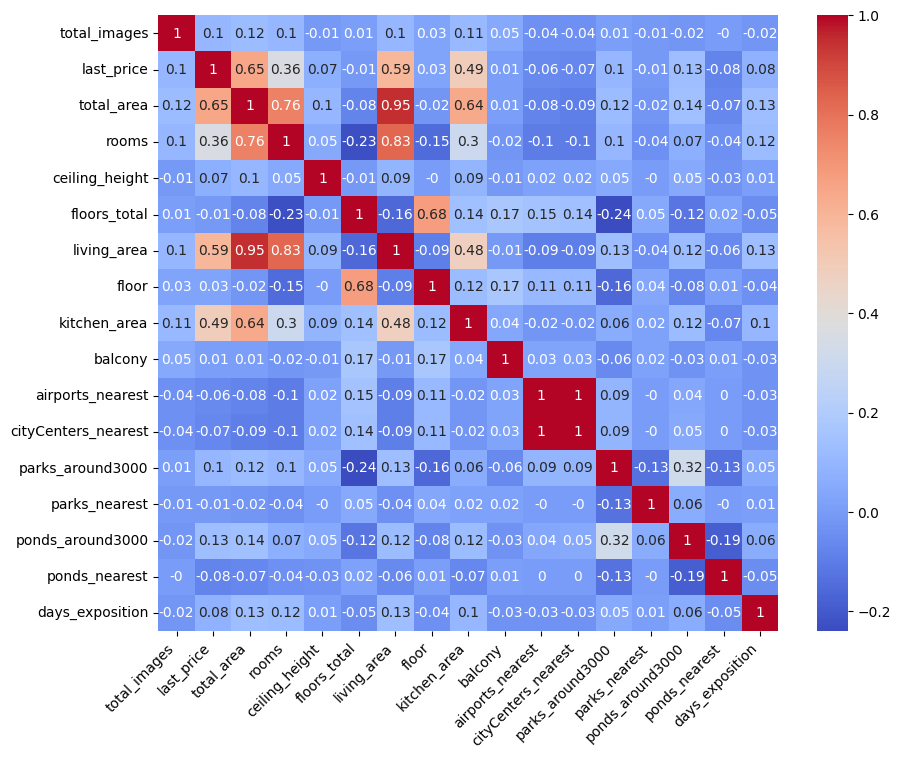

In [608]:
numeric_df = real_estate_data.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')

plt.show()

In [609]:
real_estate_data['first_day_exposition'] = pd.to_datetime(real_estate_data['first_day_exposition'])

#### Выявление выбросов и аномалий

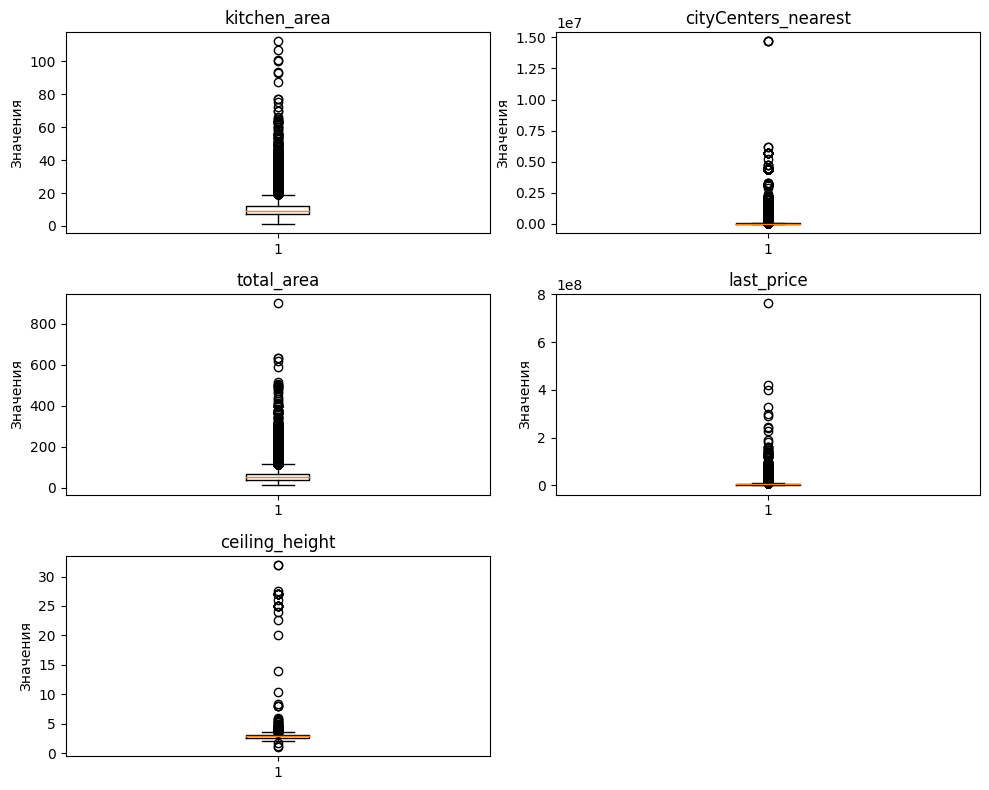

In [610]:
plt.figure(figsize=(10, 8))

plt.subplot(3, 2, 1)
plt.boxplot(real_estate_data['kitchen_area'])
plt.ylabel('Значения')
plt.title('kitchen_area')

plt.subplot(3, 2, 2)
plt.boxplot(real_estate_data['cityCenters_nearest'])
plt.ylabel('Значения')
plt.title('cityCenters_nearest')

plt.subplot(3, 2, 3)
plt.boxplot(real_estate_data['total_area'])
plt.ylabel('Значения')
plt.title('total_area')

plt.subplot(3, 2, 4)
plt.boxplot(real_estate_data['last_price'])
plt.ylabel('Значения')
plt.title('last_price')

plt.subplot(3, 2, 5)
plt.boxplot(real_estate_data['ceiling_height'])
plt.ylabel('Значения')
plt.title('ceiling_height')

plt.tight_layout()
plt.show()

In [611]:
real_estate_data[(real_estate_data['ceiling_height'] > 10) & (real_estate_data['is_apartment'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5076,0,3850000.0,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,5.5,0.0,Санкт-Петербург,29686.000000,8389.000000,3.0,397.0,1.0,578.0,7.0
22937,14,4000000.0,98.0,2018-03-15,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,16509.059597,32449.773793,1.0,491.0,1.0,518.0,27.0


In [612]:
real_estate_data = real_estate_data[(real_estate_data['ceiling_height'] < 10) | (real_estate_data['is_apartment'] != True)]

In [613]:
real_estate_data[real_estate_data['last_price'] == real_estate_data['last_price'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,3.0,10.0,250.0,10,False,...,45.406352,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0


In [614]:
real_estate_data[real_estate_data['total_area'] == real_estate_data['total_area'].max()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
19540,8,420000000.0,900.0,2017-12-06,12,2.8,25.0,409.7,25,False,...,112.0,0.0,Санкт-Петербург,30706.0,7877.0,0.0,491.0,2.0,318.0,106.0


In [615]:
df_sorted = real_estate_data.sort_values(by=['last_price', 'total_area'], ascending=False).head(10)
df_sorted

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
12971,19,763000000.0,400.0,2017-09-30,7,3.00,10.0,250.000000,10,False,...,45.406352,2.0,Санкт-Петербург,25108.0,3956.0,1.0,530.0,3.0,756.0,33.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.700000,25,False,...,112.000000,0.0,Санкт-Петербург,30706.0,7877.0,0.0,491.0,2.0,318.0,106.0
14706,15,401300000.0,401.0,2016-02-20,5,3.00,9.0,204.000000,9,False,...,24.000000,3.0,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7.0,95.000000,5,False,...,40.000000,0.0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
15651,20,300000000.0,618.0,2017-12-18,7,3.40,7.0,258.000000,5,False,...,70.000000,0.0,Санкт-Петербург,32440.0,5297.0,0.0,491.0,2.0,198.0,111.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6.0,63.700000,6,False,...,30.200000,0.0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,181.0
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7.0,182.800000,4,False,...,29.800000,0.0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7.0,218.000000,7,False,...,40.000000,0.0,Санкт-Петербург,32440.0,5297.0,0.0,491.0,2.0,198.0,199.0
5893,3,230000000.0,500.0,2017-05-31,6,3.00,7.0,296.862132,7,False,...,40.000000,0.0,Санкт-Петербург,32440.0,5297.0,0.0,491.0,2.0,198.0,50.0
8900,13,190870000.0,268.0,2016-03-25,3,3.00,8.0,132.000000,7,False,...,40.000000,0.0,Санкт-Петербург,32440.0,5297.0,0.0,491.0,2.0,198.0,901.0


In [616]:
df_sorted = real_estate_data.sort_values(by=['last_price', 'living_area']).head(10)
df_sorted

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.000000,25,False,...,40.500000,0.0,Санкт-Петербург,3.642100e+04,9.176000e+03,1.0,805.0,0.0,518.0,8.0
17456,7,430000.0,30.4,2019-04-22,1,3.00,2.0,16.000000,1,False,...,6.000000,0.0,Сланцы,1.454183e+05,1.565871e+05,1.0,491.0,1.0,518.0,181.0
14911,5,430000.0,54.0,2018-06-26,2,3.00,3.0,30.825632,3,False,...,9.876487,0.0,посёлок станции Свирь,1.811660e+05,1.694010e+05,1.0,491.0,1.0,518.0,44.0
16274,18,440000.0,40.0,2018-07-10,1,3.00,5.0,22.474711,1,False,...,8.438863,0.0,деревня Старополье,1.273419e+05,1.405383e+05,1.0,491.0,1.0,518.0,45.0
17676,0,450000.0,36.5,2018-02-01,1,3.00,5.0,17.300000,4,False,...,8.500000,1.0,деревня Ям-Тесово,1.025949e+05,1.187529e+05,1.0,491.0,1.0,518.0,120.0
16219,14,450000.0,38.5,2018-07-11,2,2.65,2.0,21.579969,1,False,...,8.284831,0.0,деревня Вахнова Кара,1.739596e+05,1.648344e+05,1.0,491.0,1.0,518.0,45.0
5698,7,450000.0,42.0,2017-07-31,2,3.00,1.0,23.000000,1,False,...,5.800000,0.0,городской посёлок Будогощь,1.811660e+05,1.694010e+05,1.0,491.0,1.0,518.0,233.0
9581,7,450000.0,43.4,2018-08-31,2,3.00,5.0,30.300000,3,False,...,5.500000,0.0,деревня Старополье,1.273419e+05,1.405383e+05,1.0,491.0,1.0,518.0,96.0
21912,0,470000.0,37.0,2018-02-18,1,3.00,3.0,20.685228,3,False,...,8.130800,0.0,поселок Совхозный,1.373719e+06,1.382272e+06,1.0,491.0,1.0,518.0,45.0
23483,11,470000.0,44.5,2018-07-02,2,3.00,2.0,28.000000,2,False,...,7.500000,0.0,Сланцы,1.454183e+05,1.565871e+05,1.0,491.0,1.0,518.0,298.0


In [617]:
real_estate_data.drop(index=real_estate_data[real_estate_data['last_price'] == 12190.0].index, inplace=True)

/var/folders/3w/n_v3q6fn3vq2qgcbqywz1n7w0000gp/T/ipykernel_4494/1234179992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_estate_data.drop(index=real_estate_data[real_estate_data['last_price'] == 12190.0].index, inplace=True)


In [618]:
# real_estate_data = real_estate_data[real_estate_data['last_price'] < 190870000.0]

#### СПБ и пригороды

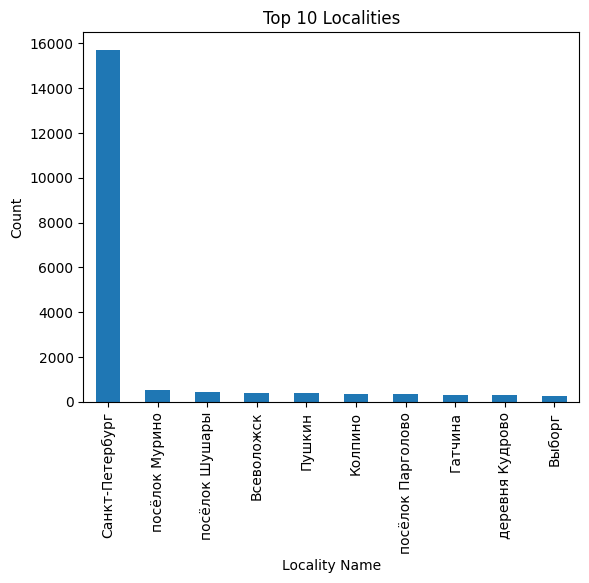

In [619]:
real_estate_data['locality_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Localities')
plt.xlabel('Locality Name')
plt.ylabel('Count')
plt.show()

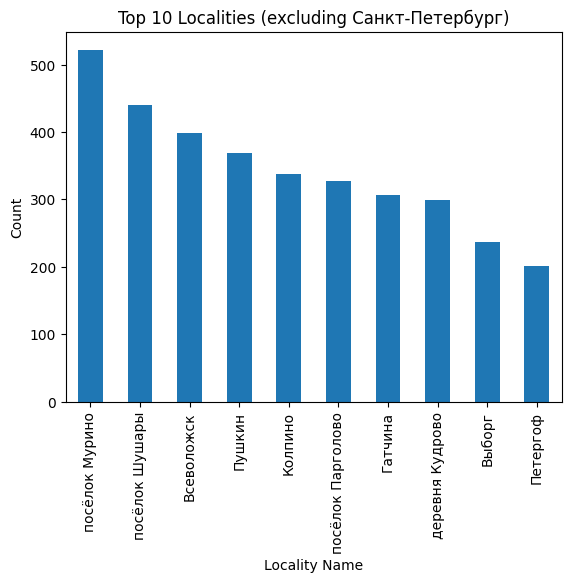

In [620]:
real_estate_data[real_estate_data['locality_name'] != 'Санкт-Петербург']['locality_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Localities (excluding Санкт-Петербург)')
plt.xlabel('Locality Name')
plt.ylabel('Count')
plt.show()

In [621]:
df_not_spb = real_estate_data[real_estate_data['locality_name'] != 'Санкт-Петербург'].select_dtypes(include=['number'])
df_not_spb

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,1,3.0,11.0,18.60,1,11.000000,2.0,1.281700e+04,1.860300e+04,0.0,491.0,0.0,518.0,81.0
5,10,2890000.0,30.40,1,3.0,12.0,14.40,5,9.100000,0.0,7.474850e+05,7.563251e+05,1.0,491.0,1.0,518.0,55.0
6,6,3700000.0,37.30,1,3.0,26.0,10.60,6,14.400000,1.0,5.299600e+04,1.914300e+04,0.0,491.0,0.0,518.0,155.0
8,20,2900000.0,33.16,1,3.0,27.0,15.43,26,8.810000,0.0,4.432907e+06,4.423898e+06,1.0,491.0,1.0,518.0,189.0
11,9,3300000.0,44.00,2,3.0,5.0,31.00,4,6.000000,1.0,4.825200e+04,5.167700e+04,0.0,491.0,0.0,518.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,2,1350000.0,30.00,1,3.0,5.0,17.50,4,6.000000,0.0,1.847251e+05,1.842214e+05,1.0,491.0,1.0,518.0,413.0
23692,9,4600000.0,62.40,3,2.6,9.0,40.00,8,8.000000,0.0,4.560200e+04,3.410400e+04,1.0,352.0,1.0,675.0,239.0
23694,14,3100000.0,59.00,3,3.0,5.0,38.00,4,8.500000,0.0,4.460317e+04,5.538343e+04,1.0,491.0,1.0,518.0,45.0
23695,18,2500000.0,56.70,2,3.0,3.0,29.70,1,10.153743,0.0,6.073622e+05,6.171659e+05,1.0,491.0,1.0,518.0,181.0


In [622]:
df_spb = real_estate_data[real_estate_data['locality_name'] == 'Санкт-Петербург'].select_dtypes(include=['number'])
df_spb

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,3,2.70,16.0,51.000000,8,25.000000,0.0,18863.0,16028.0,1.0,482.0,2.0,755.0,181.0
2,10,5196000.0,56.00,2,3.00,5.0,34.300000,4,8.300000,0.0,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,3,3.00,14.0,93.457544,9,20.658672,0.0,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2,3.03,14.0,32.000000,13,41.000000,0.0,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
7,5,7915000.0,71.60,2,3.00,24.0,41.323934,22,18.900000,2.0,23982.0,11634.0,0.0,491.0,0.0,518.0,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23688,13,3550000.0,35.30,1,2.86,15.0,16.300000,4,9.100000,2.0,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23689,3,5500000.0,52.00,2,3.00,5.0,31.000000,2,6.000000,0.0,20151.0,6263.0,1.0,300.0,0.0,518.0,15.0
23690,11,9470000.0,72.90,2,2.75,25.0,40.300000,7,10.600000,1.0,19424.0,4489.0,0.0,491.0,1.0,806.0,519.0
23693,9,9700000.0,133.81,3,3.70,5.0,73.300000,3,13.830000,0.0,24665.0,4232.0,1.0,796.0,3.0,381.0,181.0


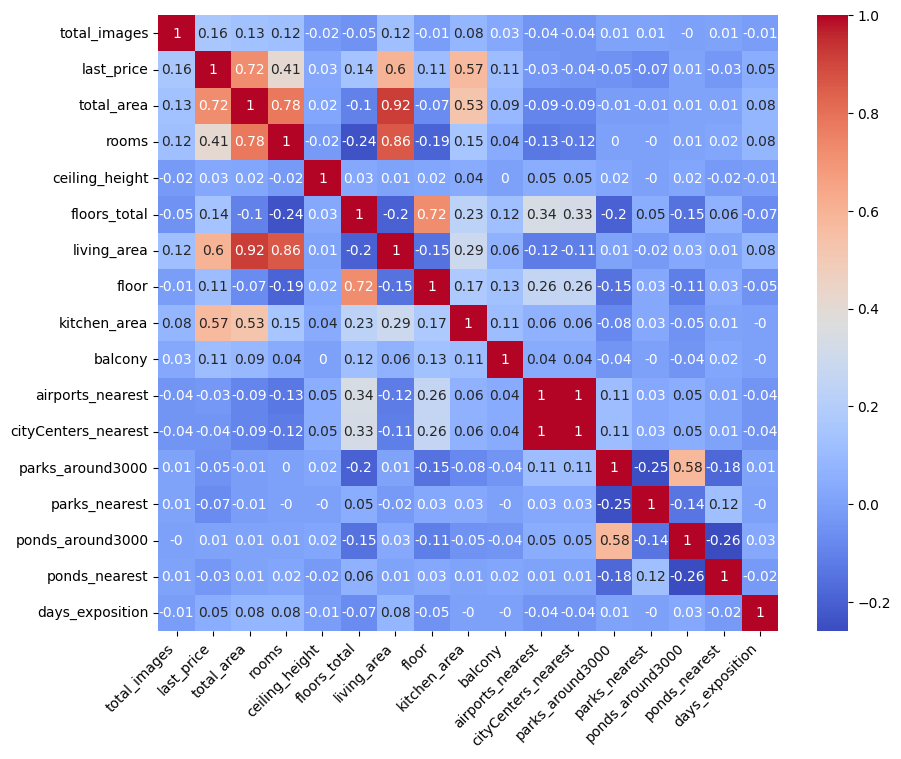

In [623]:
corr_matrix = df_not_spb.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')

plt.show()

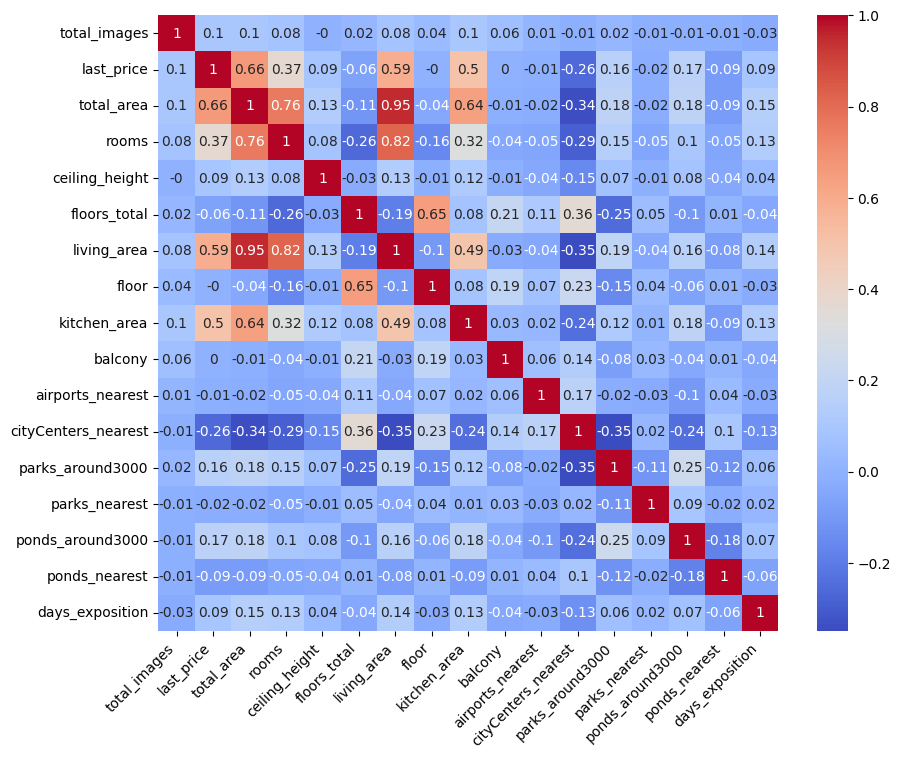

In [624]:
corr_matrix = df_spb.corr().round(2)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.xticks(rotation=45, ha='right')

plt.show()

#### Промежуточные выводы

1) Корреляция между параметрами расстояние до центра, расстоняие до аэропорта сильно изменилась
2) Корреляция между параметрами расстояние до центра, расстоняие до аэропорта для пригородов спб равна 1 
3) В is_apartment было пропущено 20924 значений. Из 2775 заполненных значений 2725 это значения False. Много НЕ квартир, что должно сильно влиять на цену. 
4) Параметры значительно влияющие на цену - total_area, rooms, living_area, kitchen_area
5) Для спб так же заметно влияни параметра cityCenters_nearest на цену, общую и жилую площадь, площадь кухни 
6) real_estate_data[real_estate_data['airports_nearest'] == 0] - ошибка?
